# Installation

```sh
pip install physico
```

# Example Usage

## 1. Dataset Evaluation

`PhysiCoDataset` is inherited from `datasets.DatasetDict`, that means you can use everything in `datasets.DatasetDict`.

In [1]:
from physico import PhysiCoDataset

core_set = PhysiCoDataset(subset="core")
core_set

DatasetDict({
    dev: Dataset({
        features: ['image', 'label', 'choices', 'input_1', 'output_1', 'input_2', 'output_2', 'input_3', 'output_3'],
        num_rows: 200
    })
    test: Dataset({
        features: ['image', 'label', 'choices', 'input_1', 'output_1', 'input_2', 'output_2', 'input_3', 'output_3'],
        num_rows: 200
    })
})

We provide additional methods to evaluate the dataset.

In [2]:
get_first = lambda x: x[0]
core_set.eval_dev(predictions=list(map(get_first, core_set["dev"]["choices"])))

0.225

We don't explicitly provide ground-truth label for the `test` set, but you can use `eval_test` method to evaluate via API calls.

<div class="alert alert-warning">
⚠️ The rate limit is set to <strong>1 call per IP address per day</strong> to avoid abuse.
</div>

In [3]:
assert all(label is None for label in core_set["test"]["label"])
core_set.eval_test(predictions=list(map(get_first, core_set["test"]["choices"])))

0.245

## 2. Visualization Tools

You can visualize the few shot examples using `grid_pairs_to_image`...

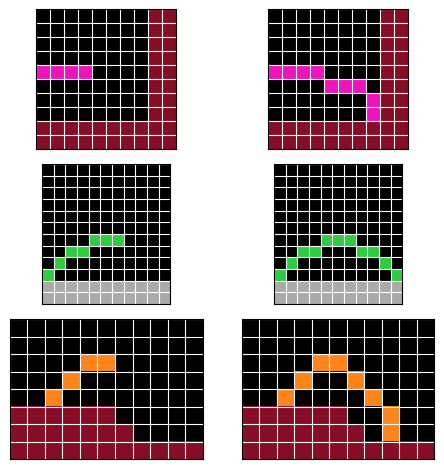

In [4]:
from physico import grid_pairs_to_image

example = core_set["dev"][0]
input_grids = [example[f"input_{i+1}"] for i in range(3)]
output_grids = [example[f"output_{i+1}"] for i in range(3)]
grid_pairs_to_image(input_grids, output_grids)

... or only visualize a single grid via `grid_to_image`.

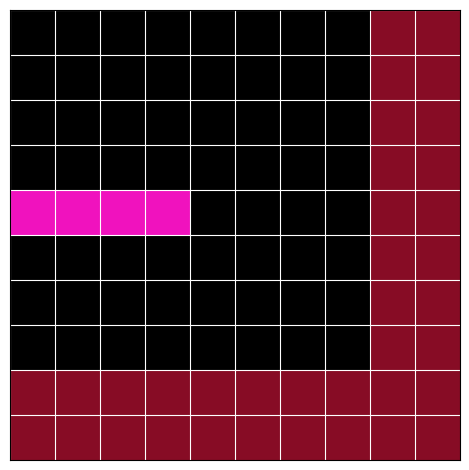

In [5]:
from physico import grid_to_image

grid_to_image(example["input_1"])